In [1]:
import mplfinance as mpf
import pandas as pd
import numpy as np
import warnings
import random
warnings.filterwarnings("ignore")

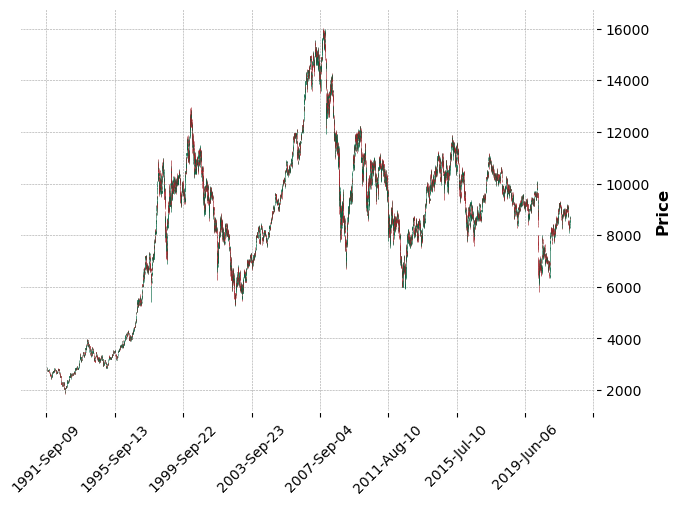

In [2]:
name_datos = 'IBEX_35'

df = pd.read_csv(name_datos + '.csv', index_col = 0)
if name_datos == 'BITCOIN':
    df = df[200:]
df.index = pd.to_datetime(df.index)
mpf.plot(df, type = 'candlestick', style = 'charles')

In [3]:
# Comprar acciones el primer día, y venderlas el último.

def dejarlo_sin_tocar(df):
    return 1000 * df.iloc[-1]['Close'] / df.iloc[0]['Open']

In [4]:
# Método para obtener el beneficio de un conjunto de datos.

def obtener_beneficio(df, lista):
    liquido = 500
    acciones = 500 / df.iloc[0]['Open']
    for fecha in lista:
        if lista[fecha] == 'vender':
            liquido += (df.loc[fecha]['Open'] * acciones)
            acciones = 0
        elif lista[fecha] == 'comprar':
            acciones += (liquido / df.loc[fecha]['Open'])
            liquido = 0
    final = liquido + (acciones * df.iloc[-1]['Close'])
    return final